In [ ]:
from PIL import Image
import matplotlib.pylab as pylab

from google.colab import files
file_uploaded = files.upload()

Saving clock.png to clock.png


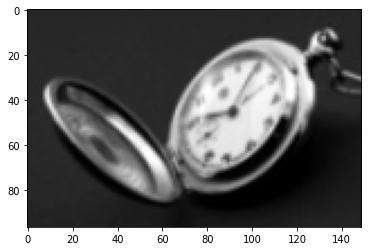

In [ ]:
im = Image.open("clock.png")
pylab.imshow(im)

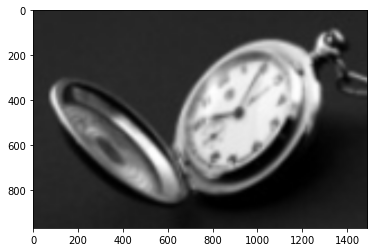

In [ ]:
# 바이큐빅 보간법
result = im.resize((im.width*10, im.height*10),Image.BILINEAR)
pylab.imshow(result)

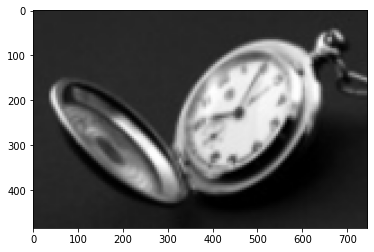

In [ ]:
result = im.resize((im.width*5, im.height*5),Image.NEAREST)
pylab.imshow(result)

In [ ]:
# scikit-image resize() 함수 사용
from skimage.io import imread
from skimage.transform import  rescale
import matplotlib.pylab as pylab

from google.colab import files
file_uploaded = files.upload()

Saving umbc.png to umbc.png


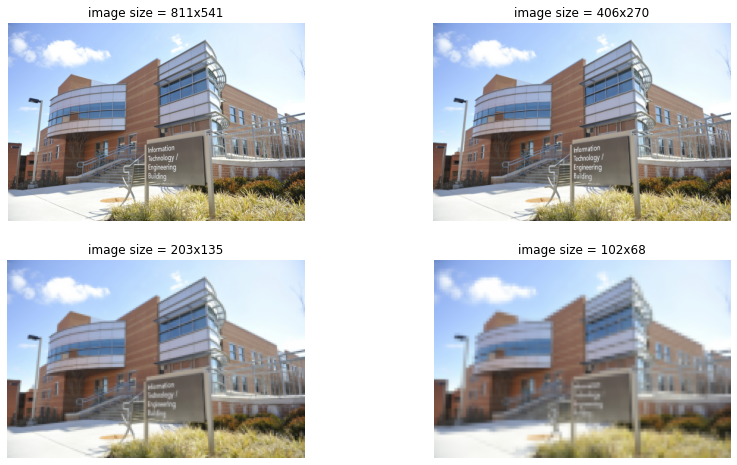

In [ ]:
org = imread('umbc.png')
im = org.copy()

pylab.figure(figsize=(14,8))

for i in range(4):
  pylab.subplot(2,2,i+1),
  pylab.imshow(im, cmap = 'gray'), pylab.axis('off')
  pylab.title('image size = ' + str(im.shape[1]) + 'x' + str(im.shape[0]))
  im = rescale(im, scale = 0.5, multichannel=True, anti_aliasing=True)

pylab.show()

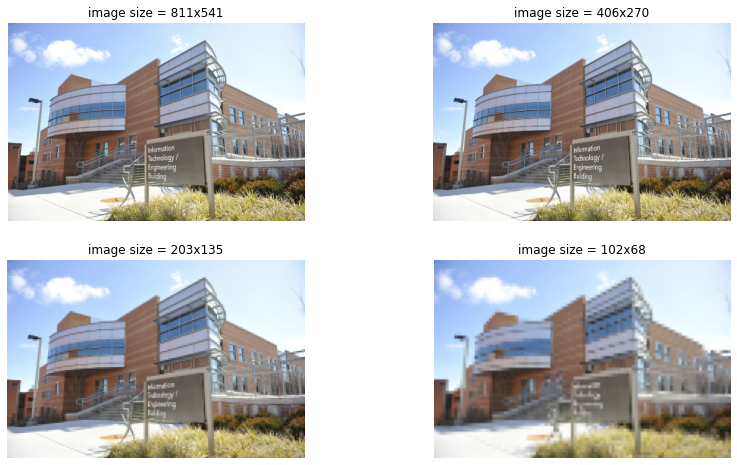

In [ ]:
org = imread('umbc.png')
im = org.copy()

pylab.figure(figsize=(14,8))

for i in range(4):
  pylab.subplot(2,2,i+1),
  pylab.imshow(im, cmap = 'gray'), pylab.axis('off')
  pylab.title('image size = ' + str(im.shape[1]) + 'x' + str(im.shape[0]))
  im = rescale(im, scale = 0.5, multichannel=True, anti_aliasing=False)

pylab.show()

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving umbc.png to umbc (1).png


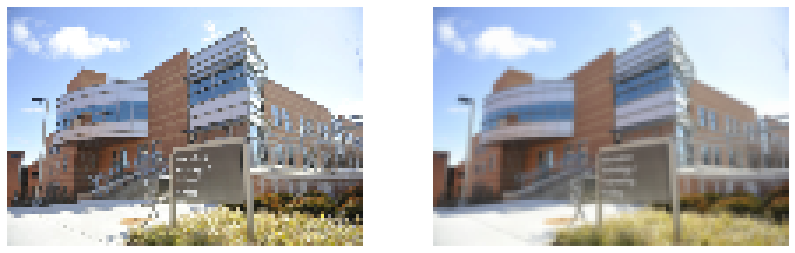

In [ ]:
org = imread('umbc.png')
pylab.figure(figsize=(14,8))

im1 = rescale(org, scale= 0.125, multichannel = True, anti_aliasing=False)

pylab.subplot(121), pylab.imshow(im1, cmap='gray'), pylab.axis('off')

im2 = rescale(org, scale=0.125, multichannel=True, anti_aliasing=True)

pylab.subplot(122), pylab.imshow(im2, cmap='gray'), pylab.axis('off')

pylab.show()

In [ ]:
from PIL import Image
import matplotlib.pylab as pylab
import numpy as np

In [ ]:
num_colors_list = [1 << n for n in range(8, 0, -1)]
num_colors_list
from google.colab import files
file_uploaded = files.upload()

Saving umbc.png to umbc (2).png


In [ ]:
org = Image.open('umbc.png')
print(org.mode)
np.array(org)

RGB


array([[[103, 135, 196],
        [103, 135, 196],
        [104, 136, 196],
        ...,
        [196, 216, 251],
        [195, 215, 250],
        [195, 215, 250]],

       [[104, 136, 197],
        [105, 137, 198],
        [105, 137, 198],
        ...,
        [197, 217, 251],
        [196, 216, 251],
        [195, 215, 250]],

       [[104, 136, 197],
        [105, 137, 198],
        [106, 138, 199],
        ...,
        [198, 218, 253],
        [197, 217, 252],
        [195, 215, 250]],

       ...,

       [[214, 218, 217],
        [215, 219, 218],
        [217, 221, 220],
        ...,
        [181, 171, 145],
        [146, 136, 110],
        [144, 126,  80]],

       [[213, 217, 216],
        [214, 218, 217],
        [215, 219, 218],
        ...,
        [175, 164, 135],
        [171, 152, 114],
        [182, 165, 111]],

       [[212, 216, 215],
        [214, 218, 217],
        [216, 218, 217],
        ...,
        [150, 135,  90],
        [184, 163, 108],
        [189, 174, 130]]

In [ ]:
im = org.convert('P', palette=Image.ADAPTIVE, colors=64)
print(im.mode)
np.array(im)

P


array([[41, 41, 41, ..., 17, 17, 17],
       [41, 40, 40, ..., 17, 17, 17],
       [41, 40, 40, ..., 17, 17, 17],
       ...,
       [20, 20, 20, ..., 32, 38, 39],
       [20, 20, 20, ..., 24, 33, 24],
       [20, 20, 20, ..., 38, 33, 24]], dtype=uint8)

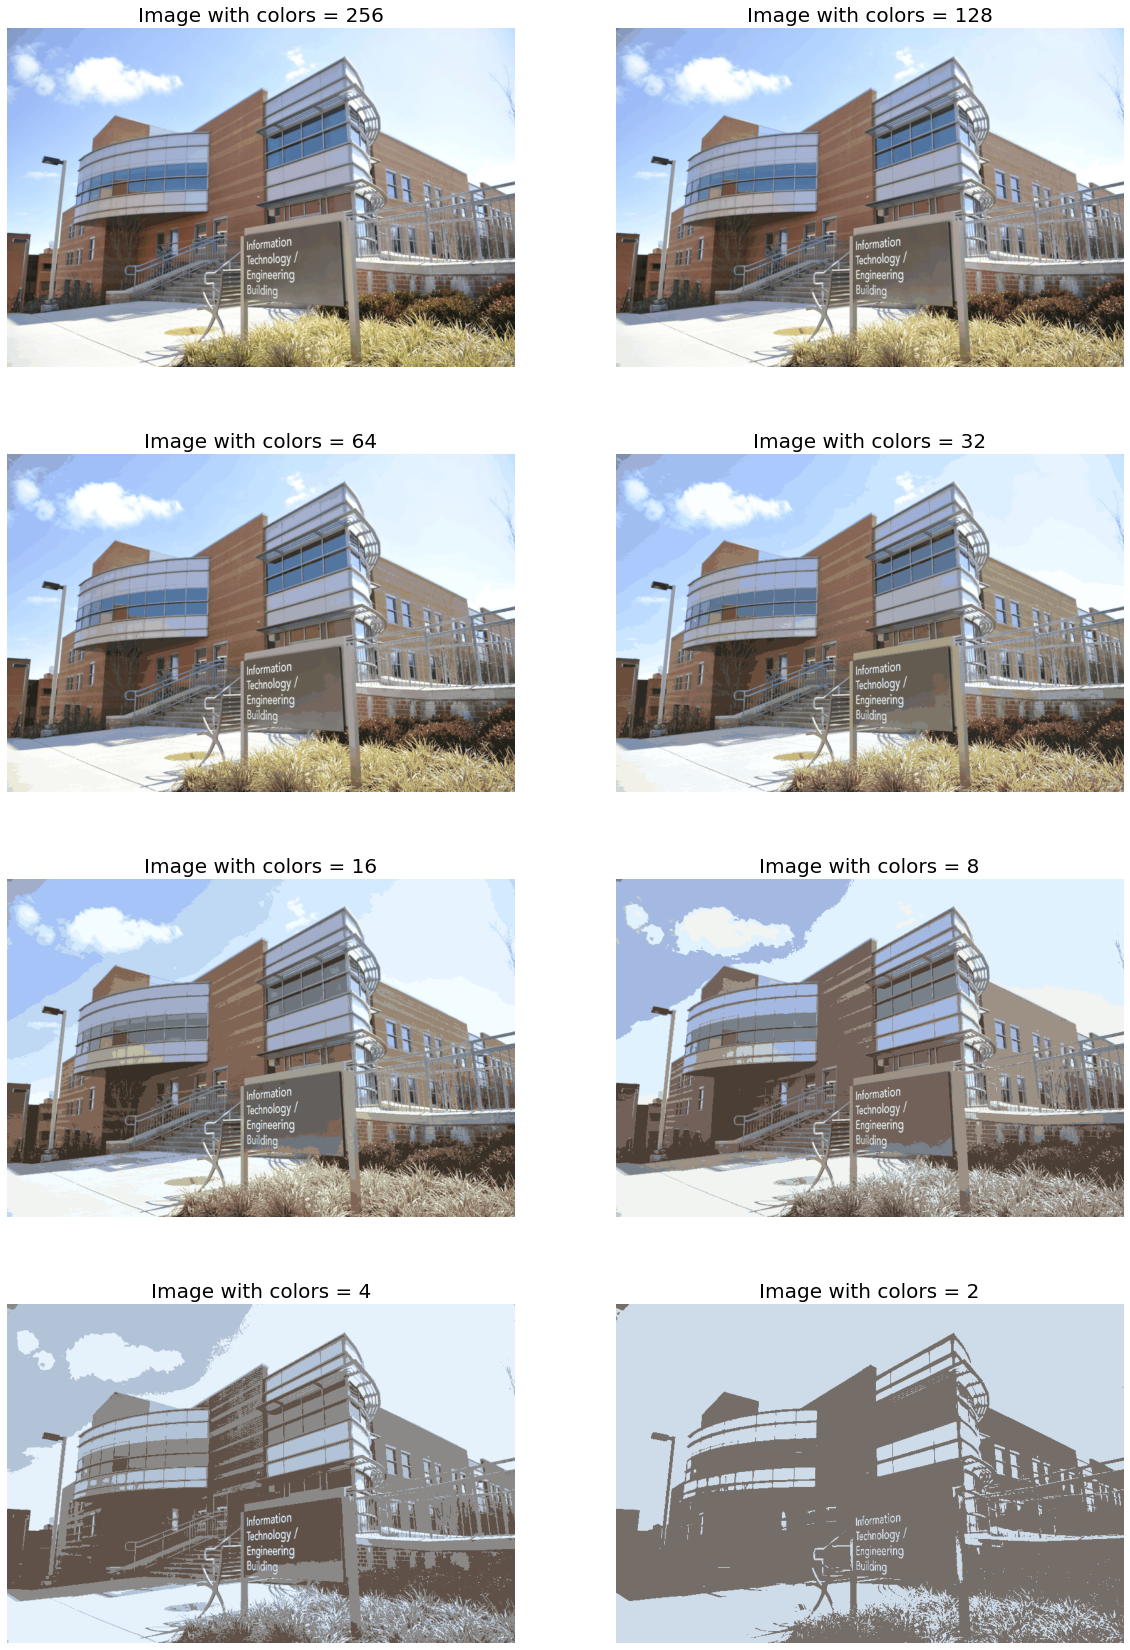

In [ ]:
org = Image.open('umbc.png')
pylab.figure(figsize=(20, 30))

num_colors_list = [1 << n for n in range(8, 0, -1)]

i = 1
for num_colors in num_colors_list:
  im = org.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
  pylab.subplot(4, 2, i), pylab.imshow(im), pylab.axis('off')

  pylab.title(f'Image with colors = {num_colors}', size=20)
  i +=1

pylab.show()

In [ ]:
from scipy import stats
from math import log10
def signal_to_noise(im1, im2):
  a1 = np.array(im1)
  a2 = np.array(im2)

  sum1 = 0
  sum2 = 0
  for x in range(im1.width):
    for y in range(im1.height):
      sum1 += a1[x, y] ** 2
      sum2 += (np.int32(a1[x, y] - a2[x, y]))

    return np.where(sum2 == 0, 0, sum1 / sum2)

def peak_signal_to_noise(im1, im2):
  a1 = np.array(im1)
  a2 = np.array(im2)

  sum = 0
  for x in range(im1.width):
    for y in range(im1.height):
      sum += (np.int32(a1[x, y]) - a2[x, y]) ** 2

  MSE = sum / (im.width * im1.height)
  return np.where(MSE == 0, 0, 10 * log10((255 ** 2) / MSE))


In [ ]:
from google.colab import files
file_uploaded = files.upload()

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


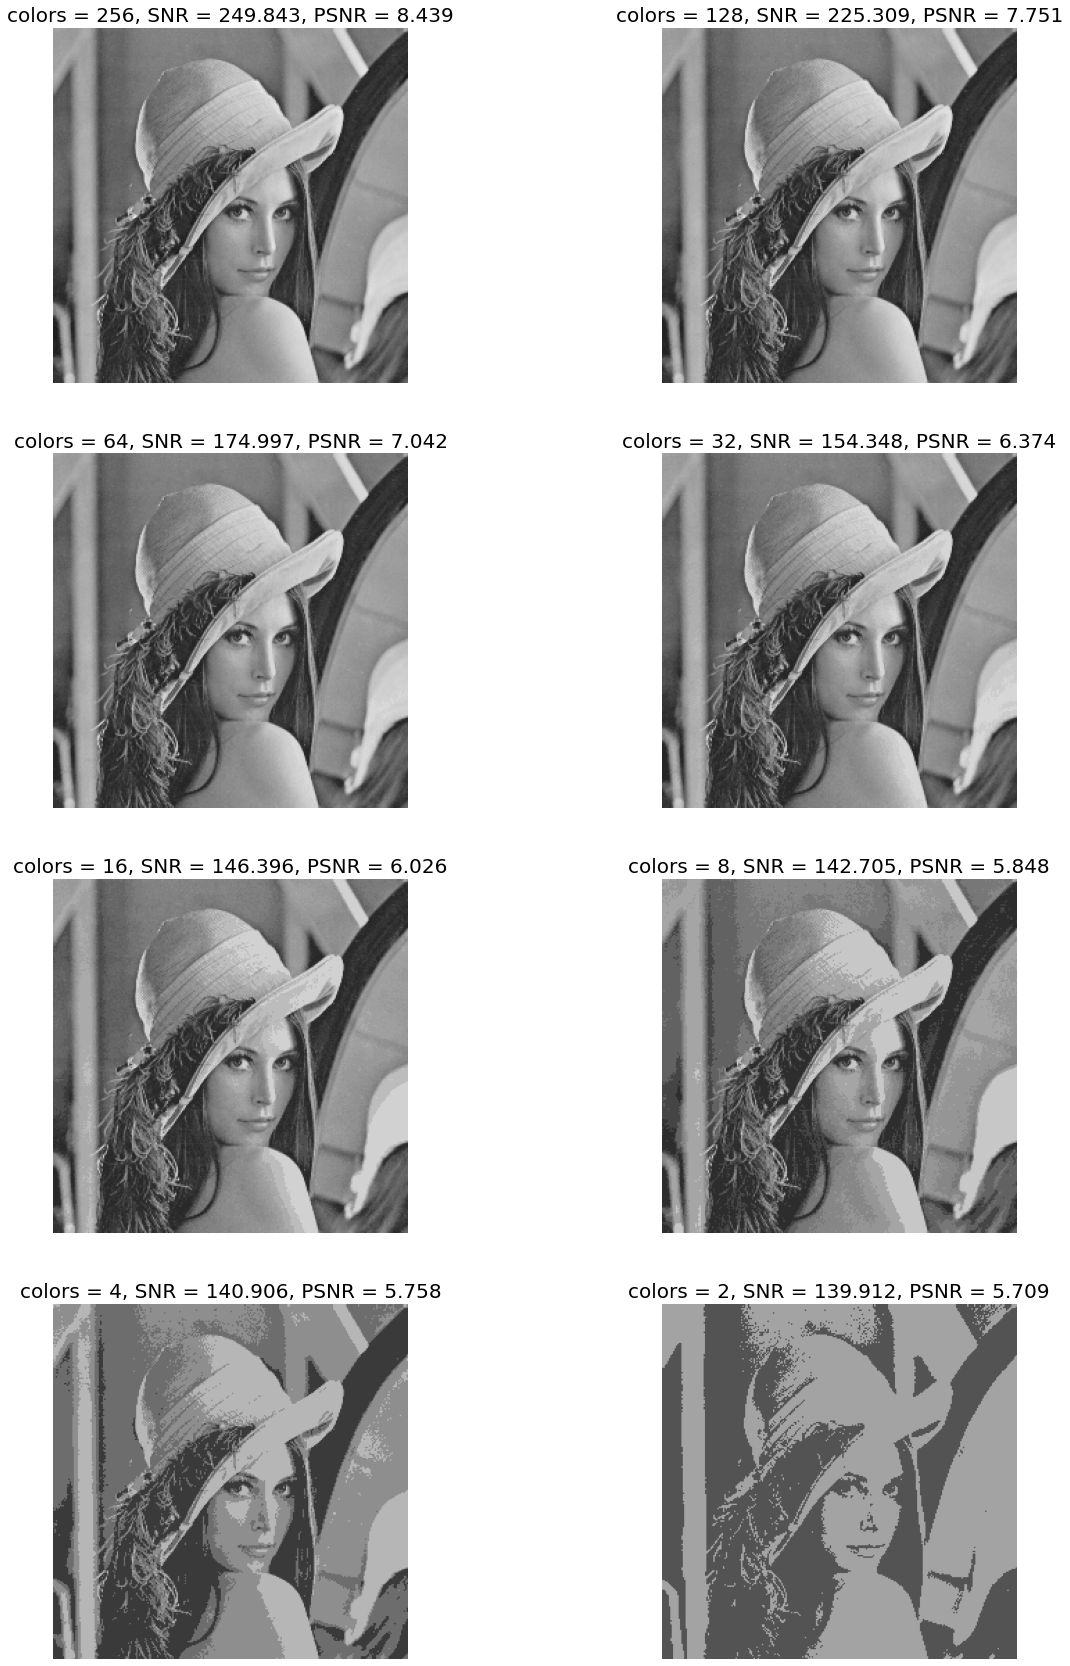

In [ ]:
org = Image.open('LENA256.jpg')
pylab.figure(figsize=(20, 30))

num_colors_list = [1 << n for n in range(8, 0, -1)]

i = 1
for num_colors in num_colors_list:
  im = org.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
  pylab.subplot(4, 2, i), pylab.imshow(im), pylab.axis('off')

  SNR = signal_to_noise(org, im)
  PSNR = peak_signal_to_noise(org, im)
  pylab.title(f'colors = {num_colors}, ' + f'SNR = {np.round(SNR, 3)}, ' + f'PSNR = {np.round(PSNR, 3)}', size=20)

  i +=1
pylab.show()

In [ ]:
from google.colab import files
file_uploaded = files.upload()

NameError: ignored

In [ ]:
org = np.array(Image.open('LENA256.jpg').convert('L'))

freq = fp.fft2(org) # FFT 호출
freq2 = fp.fftshift(freq)

pylab.figure(figsize=(20, 10))

pylab.subplot(121), pylab.axis('off')
pylab.imshow((20 * np.log10(0.1 + freq)).astype(int)), pylab.title('FFT', size=20)

pylab.subplot(122), pylab.axis('off')
pylab.imshow((20 * np.log10(0.1 + freq2)).astype(int)), pylab.title('FFT', size=20)

pylab.title('FFT-shift', size= 20)

pylab.show()
